C:\Users\Mahesh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.6866 - loss: 0.8524 - val_accuracy: 0.8441 - val_loss: 0.4346
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.8583 - loss: 0.3931 - val_accuracy: 0.8712 - val_loss: 0.3522
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.8846 - loss: 0.3189 - val_accuracy: 0.8906 - val_loss: 0.3058
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.8945 - loss: 0.2880 - val_accuracy: 0.8917 - val_loss: 0.2942
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9054 - loss: 0.2606 - val_accuracy: 0.9011 - val_loss: 0.2735
Training time:  80.02345633506775
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8985 - loss: 0.2891
Test Loss: 0.27996301651000977
Test Accuracy: 0.8996000289916992
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


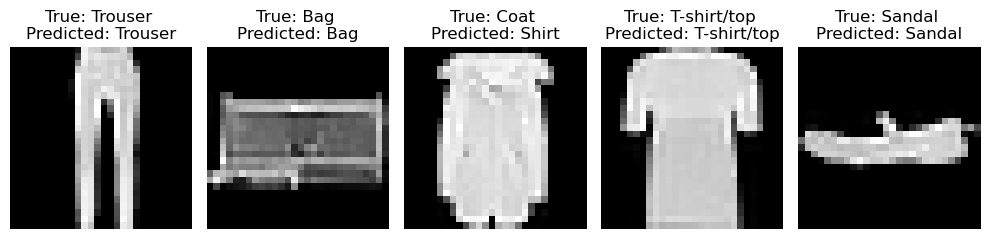

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

import time

start_time=time.time()

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

train_time=time.time()-start_time

print("Training time: ", train_time)

# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)  # Add this line to print the accuracy

# Select random images from the test set
num_samples = 5
random_indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

# Make predictions on the sample images
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Define class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show images with their predicted and true labels
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_labels[np.argmax(sample_labels[i])]} \nPredicted: {class_labels[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import cv2

def preprocess_image(image_path):
  """
  Preprocesses a fashion image with black background and white foreground.

  Args:
      image_path: Path to the image file.

  Returns:
      A NumPy array representing the preprocessed image.
  """
  # Read the image
  image = cv2.imread(image_path)
  # Convert BGR (OpenCV default) to RGB (Matplotlib default)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.title("Original Image")
  # Display the image
  plt.imshow(image_rgb)
  # plt.axis('off')  # Turn off axis labels
  plt.show()


  # Load the image from the file path in grayscale mode
  img = load_img(image_path, grayscale=True, target_size=(28, 28))
  # Convert the image to a NumPy array
  img_array = img_to_array(img)
  # Invert the grayscale values (black -> white, white -> black)
  img_array = 255 - img_array
  # Show grayscale image
  plt.title("Preprocessed Grayscale Image")
  plt.imshow(img_array, cmap='gray')
  # Reshape the image array to add a dimension for the color channel (even though it's grayscale)
  img_array = img_array.reshape((1, 28, 28, 1))

  # Normalize the pixel values to be between 0 and 1
  return img_array / 255.0

import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import ImageTk, Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Assuming 'model' and 'train_generator' are defined elsewhere in your code

def predict_disease(image_path):
    try:
        x = preprocess_image(image_path)
        predictions = model.predict(x)
        predicted_label = class_labels[np.argmax(predictions)]
        return predicted_label
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred during prediction: {str(e)}")
        return "Unknown"

def select_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        try:
            img = Image.open(file_path)
            img = img.resize((300, 300), Image.ANTIALIAS)
            img = ImageTk.PhotoImage(img)
            image_label.config(image=img)
            image_label.image = img
            predicted_label = predict_disease(file_path)
            result_label.config(text=f"Predicted Label: {predicted_label}")
            predicted_label, prediction_time = predict_disease(file_path)
            result_label.config(text=f"Predicted Label: {predicted_label}, Prediction Time: {prediction_time:.4f} seconds")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Creating the main application window
root = tk.Tk()
root.title("Fashion prediction")

# Creating the GUI components
select_button = tk.Button(root, text="Select Image", command=select_image)
select_button.pack(pady=10)

image_label = tk.Label(root)
image_label.pack(pady=10)

result_label = tk.Label(root, text="")
result_label.pack(pady=10)

# Running the main event loop
root.mainloop()